### Generating the Clifford gates

In [242]:
import numpy as np
import qutip
from qutip import basis
from numpy.random import randint,choice
import math
import copy

In [294]:
def random_clifford_generator(n):
    H = np.asarray([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]],dtype=np.complex_)
    P = np.asarray([[1,0],[0,1j]], dtype=np.complex_)
    H_inv = np.linalg.inv(H) #calculate the inverses of H and P 
    P_inv = np.linalg.inv(P)
    A = [1,-1]
    #create a random sequence of size n and associate 0 to H and 1 to P
    values = randint(0, 2, n)
    power = [choice(A) for i in range(n)]
    #initializing the clifford gate
    if values[0] == 1 and power[0] == 1: 
        Cliff = H
    elif values[0] == 1 and power[0] == -1: 
        Cliff = H_inv
    elif values[0] == 0 and power[0] == 1: 
        Cliff = P
    else: 
        Cliff = P_inv 
    #composing 
    for j in range(1,n):
        if values[j] == 1 and power[j] == 1: 
            Cliff = np.matmul(Cliff,H)
        elif values[j] == 1 and power[j] == -1: 
            Cliff = np.matmul(Cliff,H_inv)
        elif values[j] == 0 and power[j] == 1: 
            Cliff = np.matmul(Cliff,P)
        else: 
            Cliff = np.matmul(Cliff,P_inv)
    for elem in Cliff: 
        for el in elem:
            el = round(el)
    
    return Cliff

In [299]:
random_clifford_generator(4)

array([[ 1.00000000e+00+0.j,  1.01465364e-17+0.j],
       [-1.01465364e-17+0.j, -1.00000000e+00+0.j]])

### How does a Clifford gate act on a qubit ? 

In [244]:
# we would like to visualize the effect of a clifford gate on a qubit; visualize in the Bloch Sphere when nqubit == 1 
Cliff = random_clifford_generator(3)
#is the clifford gate applied to the |0> bit 
#representation in the Bloch sphere 

<class 'qutip.qobj.Qobj'>


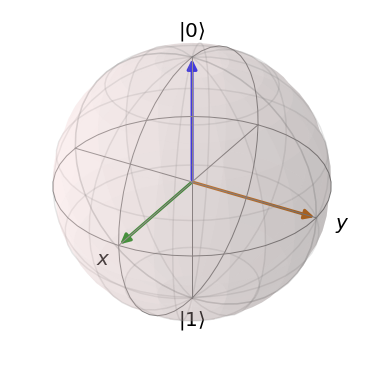

In [245]:
b = qutip.Bloch()
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = (basis(2,0)+(0+0j)*basis(2,1)).unit()
print(type(x))
b.add_states([x,y,z])
b.show()

In [246]:
def cart_to_polar(a, dtype=np.complex):
    if a == 0:
        r,theta = (0,0)
    else:
        x,y = a.real, a.imag
        r = np.sqrt(x**2+y**2)
        if x == 0:
            theta = np.sign(y) * math.pi/2
        elif y==0 and x > 0 : 
            theta = 0
        elif y==0 and x < 0 : 
            theta = math.pi
        else: 
            theta = math.atan(y/x)

    return r,theta

In [207]:
cart_to_polar(1j)

(1.0, 1.5707963267948966)

In [229]:
def hilb_to_bloch_coordinates(psi):
    a = psi[0]
    b = psi[1]
    r_a, theta_a = cart_to_polar(a)
    r_b, theta_b = cart_to_polar(b)
    phi = theta_b - theta_a
    theta = 2*math.acos(r_a)
    v = [math.sin(theta)*math.cos(phi),math.sin(theta)*math.sin(phi),math.cos(theta)]
    for i in range(3):
        if abs(v[i])< 1.e-2:
            v[i] = 0
    return v
    


In [276]:
#idea: see how the basis is transformed by a hadamard gate (subplot before/after next to each other))
Cliff = random_clifford_generator(n)
Cliff

array([[1.00000000e+00+0.j, 1.01465364e-17+0.j],
       [1.01465364e-17+0.j, 1.00000000e+00+0.j]])

In [282]:
def Clifford_effect_on_basis(Cliff): #n is linked to the size of the generator
    print("The Clifford gate is:", Cliff)
    Q_basis_after = []
    basis_after = []
    b = qutip.Bloch()
    c = qutip.Bloch()
    basis = [[1,0,0],[0,1,0],[0,0,1]]
    Q_basis = [[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),1j/np.sqrt(2)],[1,0]]
    b.add_vectors(basis)
    for elem in Q_basis: #do the Cliff operations 
        Q_basis_after.append(Cliff.dot(elem))
    for el in Q_basis_after: #convert them to Bloch representation 
        basis_after.append(hilb_to_bloch_coordinates(el))
    c.add_vectors(basis_after)
    b.show()
    c.show()
    
        
        
    

The Clifford gate is: [[0.-0.70710678j 0.+0.70710678j]
 [0.+0.70710678j 0.+0.70710678j]]


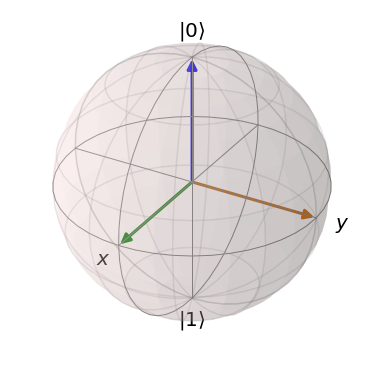

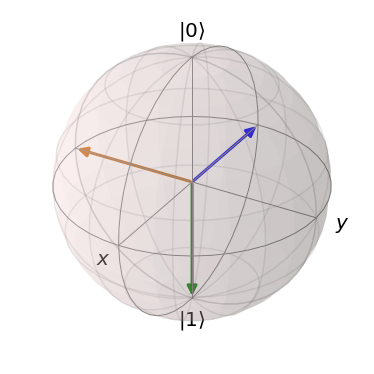

In [333]:
Clifford_effect_on_basis(Cliff)

# Random Benchmarking 

In [341]:
### How are we going to simulate noise? 

# Prepare the Clifford sequence for nseed = 1 
vector_length = [i for i in range(1,101)]
Clifford_sequence = [[] for el in vector_length] # list of sublist where sublist[k] has k gates
Clifford_inv_sequence = [[] for el in vector_length]
for l in vector_length:
    for i in range(l):
        Cliff = random_clifford_generator(15)
        Cliff_inv = np.linalg.inv(Cliff)
        Clifford_sequence[l-1].append(Cliff)
        Clifford_inv_sequence[l-1].append(Cliff_inv)
        
#inverse the Cliff_inv sequence to apply it "normally"
for li_st in Clifford_inv_sequence:
    li_st.reverse()
#Apply the gates, apply the inverses
for l in vector_length:
    q_0 = np.asarray([1,0])                 #initial state
    for Clifford in Clifford_sequence[l-1]:
        q_0 = Clifford.dot(q_0)
    for Cliff in Clifford_inv_sequence[l-1]:
        q_0 = Cliff.dot(q_0)
    #check that we get our initial state back 
    print(q_0)
    

        

[1.-1.54074396e-33j 0.-1.16553413e-33j]
[1.00000000e+00-5.66304186e-34j 6.16297582e-33+1.01465364e-17j]
[ 1.00000000e+00+1.34692639e-17j -3.41190442e-18-4.53646149e-17j]
[1.+1.45512510e-16j 0.+8.93790303e-17j]
[ 1.00000000e+00-6.83580866e-17j -3.41190442e-18-1.68811683e-17j]
[ 1.00000000e+00-3.10695764e-16j -3.92523115e-17-3.92523115e-17j]
[ 1.00000000e+00+1.01498095e-16j -1.01498095e-16+1.11022302e-16j]
[1.-2.31111593e-33j 0.-7.85046229e-17j]
[ 1.00000000e+00-3.14018492e-16j -1.24491566e-16+0.00000000e+00j]
[ 1.00000000e+00+2.94330322e-33j -1.11644631e-16+1.43539982e-16j]
[ 1.00000000e+00+6.22328532e-19j -2.24017133e-16-2.14492925e-16j]
[1.00000000e+00-4.71844785e-16j 8.32667268e-17+3.88578059e-16j]
[ 1.00000000e+00-3.92523115e-17j -1.24580743e-16-2.22044605e-16j]
[1.00000000e+00+3.33066907e-16j 3.22920371e-16+3.10073436e-16j]
[1.00000000e+00-1.11022302e-16j 1.11022302e-16+0.00000000e+00j]
[1.+1.57009246e-16j 0.-1.57009246e-16j]
[1.00000000e+00-2.28779237e-16j 2.57830476e-17+1.8952692

## Random benchmarking with density matrices

In [338]:
# convert vector to density matrix
def vector_to_density_matrix(k):
    bra = np.conjugate(k)
    return np.outer(k,bra)

def dagger(U):
    return np.conjugate(U.T)


def quantum_channel(U,rho):   #returns the density matrix
    return np.matmul(U,rho,dagger(U))
    

H = np.asarray([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]],dtype=np.complex_)
psi = np.asarray([1,0])
quantum_channel(H,vector_to_density_matrix(psi))

array([[0.70710678+0.j, 0.        +0.j],
       [0.70710678+0.j, 0.        +0.j]])

In [343]:
# Prepare initial density matrix 
q_0 = np.asarray([1,0]) 
print(vector_to_density_matrix(q_0))

# Prepare the Clifford sequence for nseed = 1 
vector_length = [i for i in range(1,101)]
Clifford_sequence = [[] for el in vector_length] # list of sublist where sublist[k] has k gates
Clifford_inv_sequence = [[] for el in vector_length]
for l in vector_length:
    for i in range(l):
        Cliff = random_clifford_generator(15)
        Cliff_inv = np.linalg.inv(Cliff)
        Clifford_sequence[l-1].append(Cliff)
        Clifford_inv_sequence[l-1].append(Cliff_inv)
        
#inverse the Cliff_inv sequence to apply it "normally"
for li_st in Clifford_inv_sequence:
    li_st.reverse()
#Apply the gates, apply the inverses
for l in vector_length:
    rho_0 = vector_to_density_matrix(q_0)         #initial state
    for Clifford in Clifford_sequence[l-1]:
        rho_0 = quantum_channel(Clifford,rho_0)
    for Cliff in Clifford_inv_sequence[l-1]:
        rho_0 = quantum_channel(Cliff,rho_0)
    #check that we get our initial state back 
    print(rho_0)
    

[[1 0]
 [0 0]]
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[1.00000000e+00-5.55111512e-17j 0.00000000e+00+0.00000000e+00j]
 [8.32667268e-17+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]]
[[ 1.00000000e+00+0.j  0.00000000e+00+0.j]
 [-5.55111512e-17+0.j  0.00000000e+00+0.j]]
[[1.00000000e+00+0.j 0.00000000e+00+0.j]
 [5.55111512e-17+0.j 0.00000000e+00+0.j]]
[[ 1.00000000e+00-2.77555756e-17j  0.00000000e+00+0.00000000e+00j]
 [-8.32667268e-17+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]]
[[ 1.0000000e+00+7.17699910e-17j  0.0000000e+00+0.00000000e+00j]
 [-1.4551251e-16+5.95453842e-17j  0.0000000e+00+0.00000000e+00j]]
[[ 1.00000000e+00-6.22457832e-17j  0.00000000e+00+0.00000000e+00j]
 [-1.11022302e-16+2.09108493e-16j  0.00000000e+00+0.00000000e+00j]]
[[1.00000000e+00+1.12994830e-16j 0.00000000e+00+0.00000000e+00j]
 [1.23141367e-16-1.11022302e-16j 0.00000000e+00+0.00000000e+00j]]
[[ 1.00000000e+00+2.49800181e-16j  0.00000000e+00+0.00000000e+00j]
 [-2.22044605e-16-1.38777878e-16j  0.00000000e+00+

## Adding noise

In [ ]:
#depolarizing error

def depolarizing_error(U):
    U*Error